In [13]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import seaborn as sns
import anndata
import mygene
import pickle
import scipy.stats
import scipy.cluster
import networkx as nx

%pylab
#%matplotlib inline
import matplotlib
matplotlib.use('TkAgg')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sc.settings.set_figure_params(dpi=300, facecolor='white')

# Minimize_flat

In [3]:
adata_minimize=schist.io.read('../../scRNA_paga/state_adata/paul15_minimize')

In [4]:
adata=adata_minimize

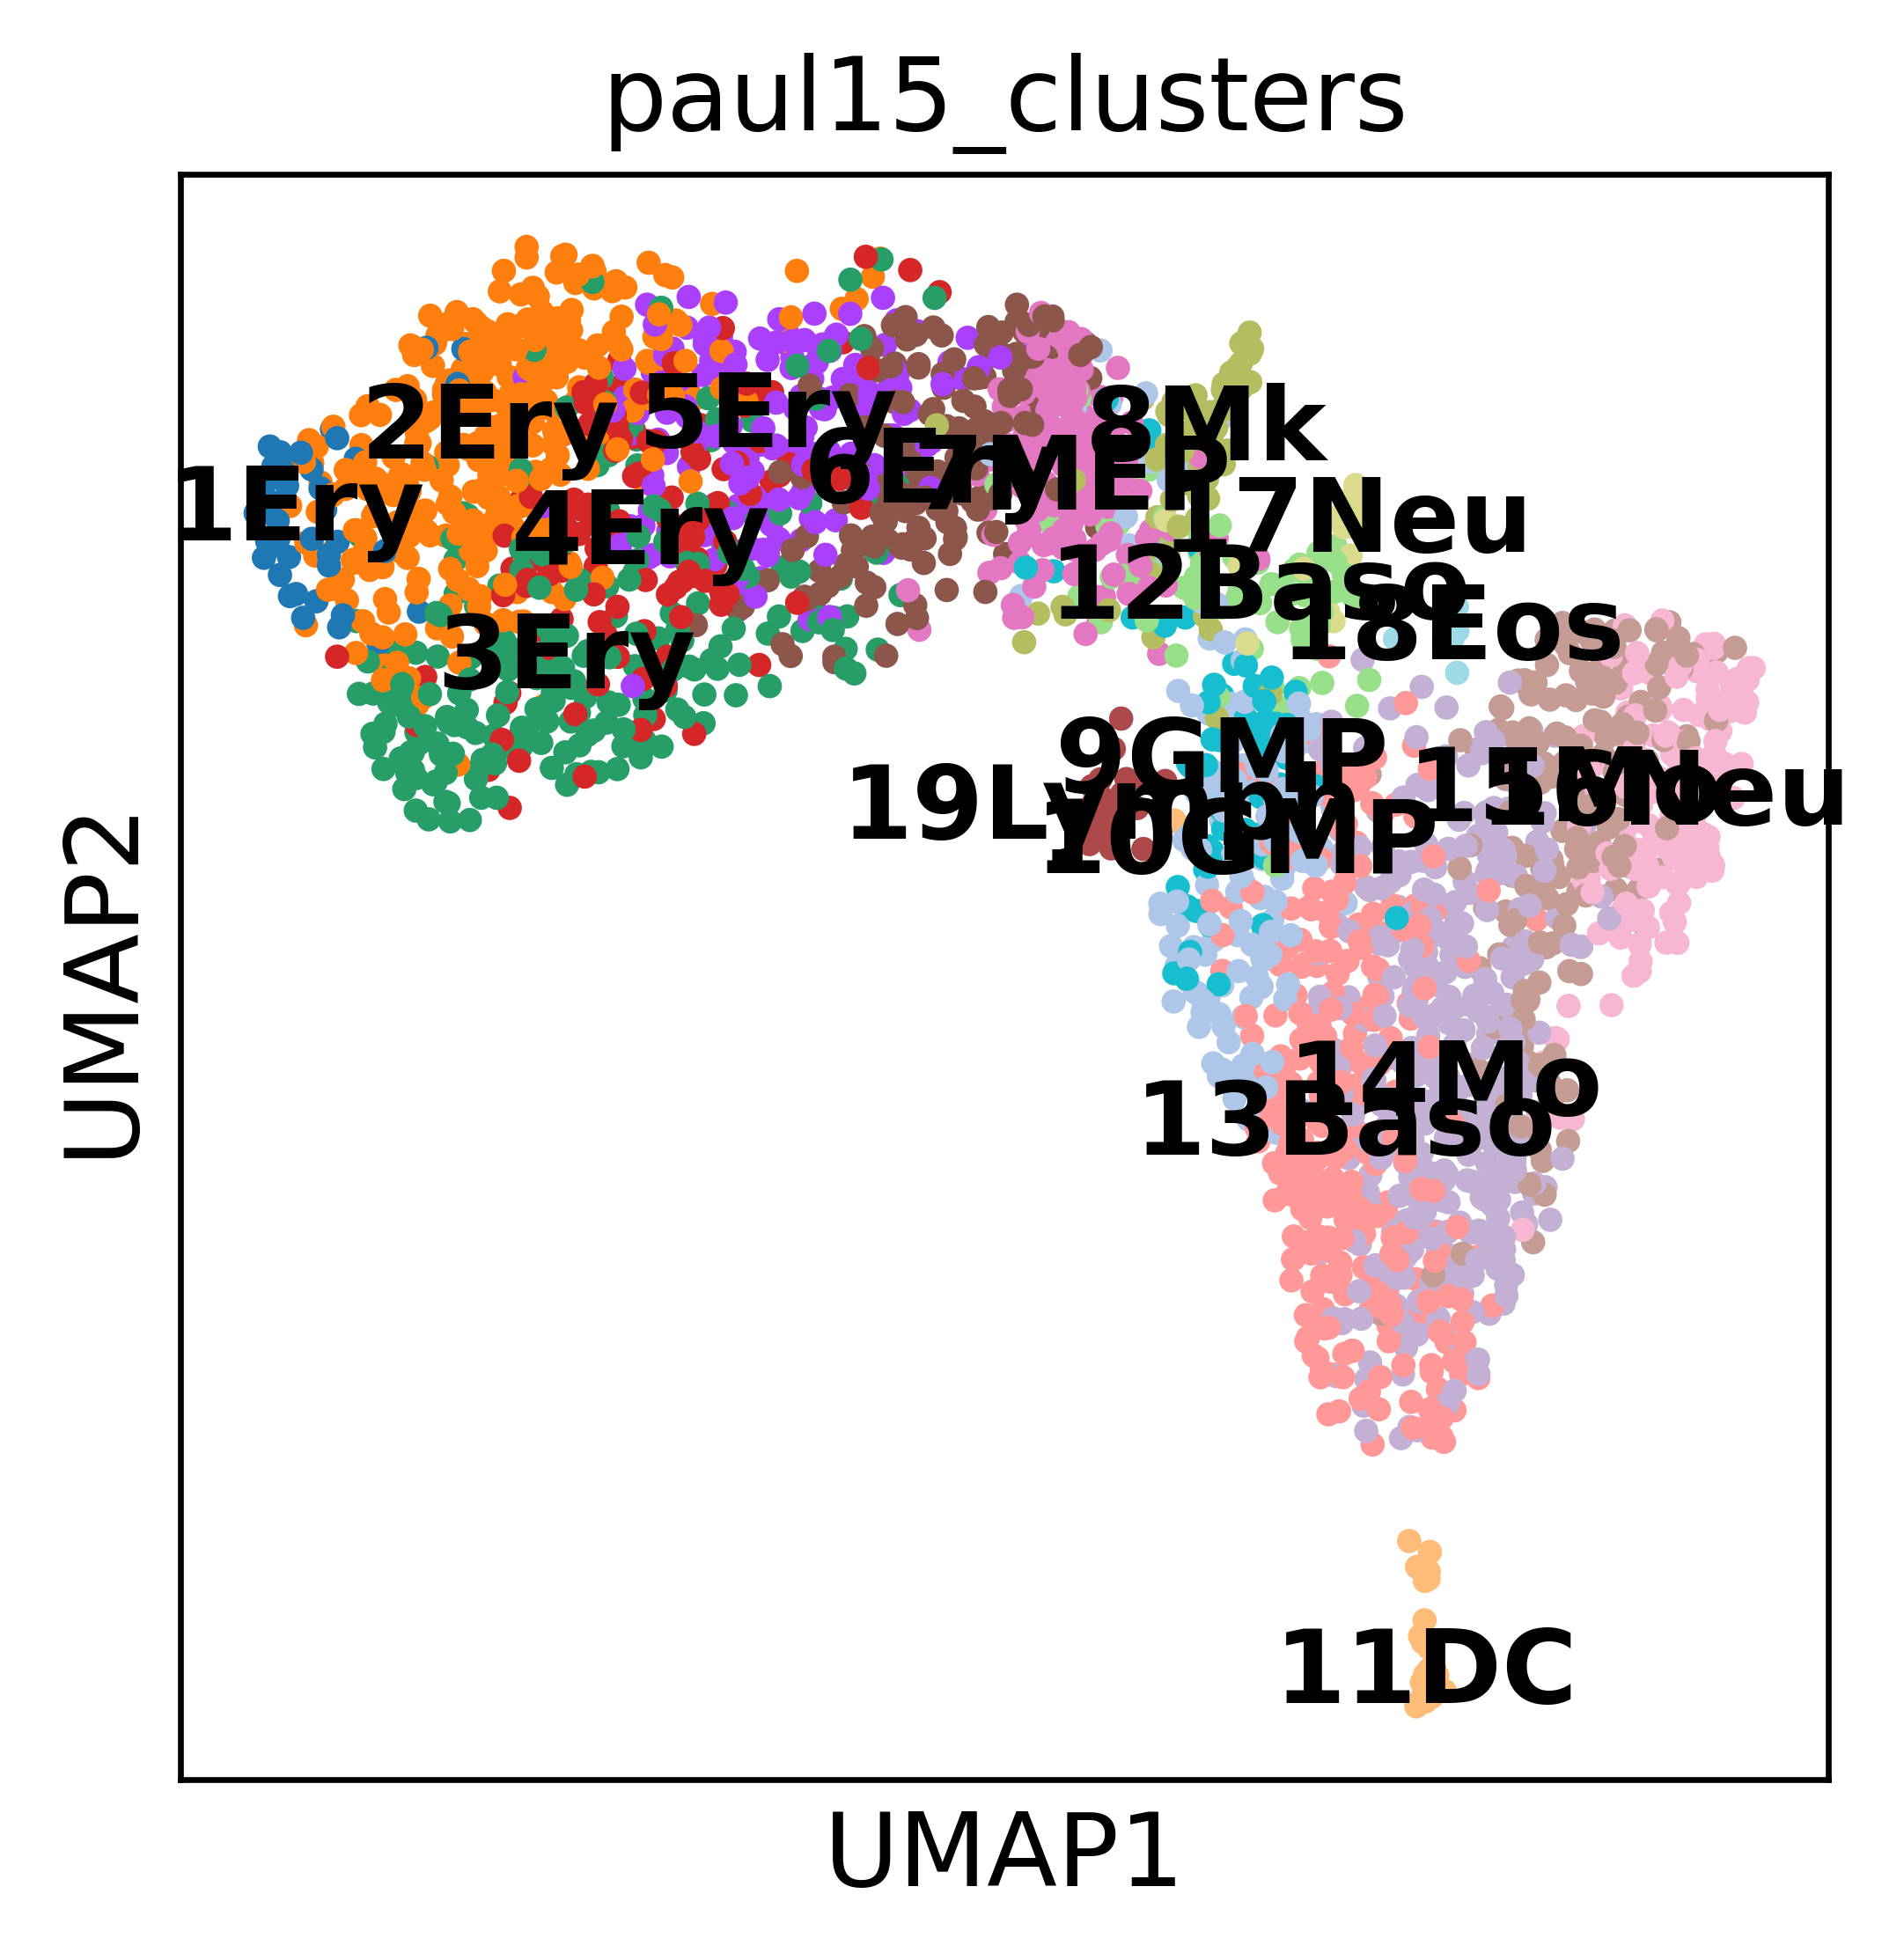

In [11]:
sc.tl.leiden(adata, resolution=3)
sc.pl.umap(adata, color=['paul15_clusters'], legend_loc='on data')

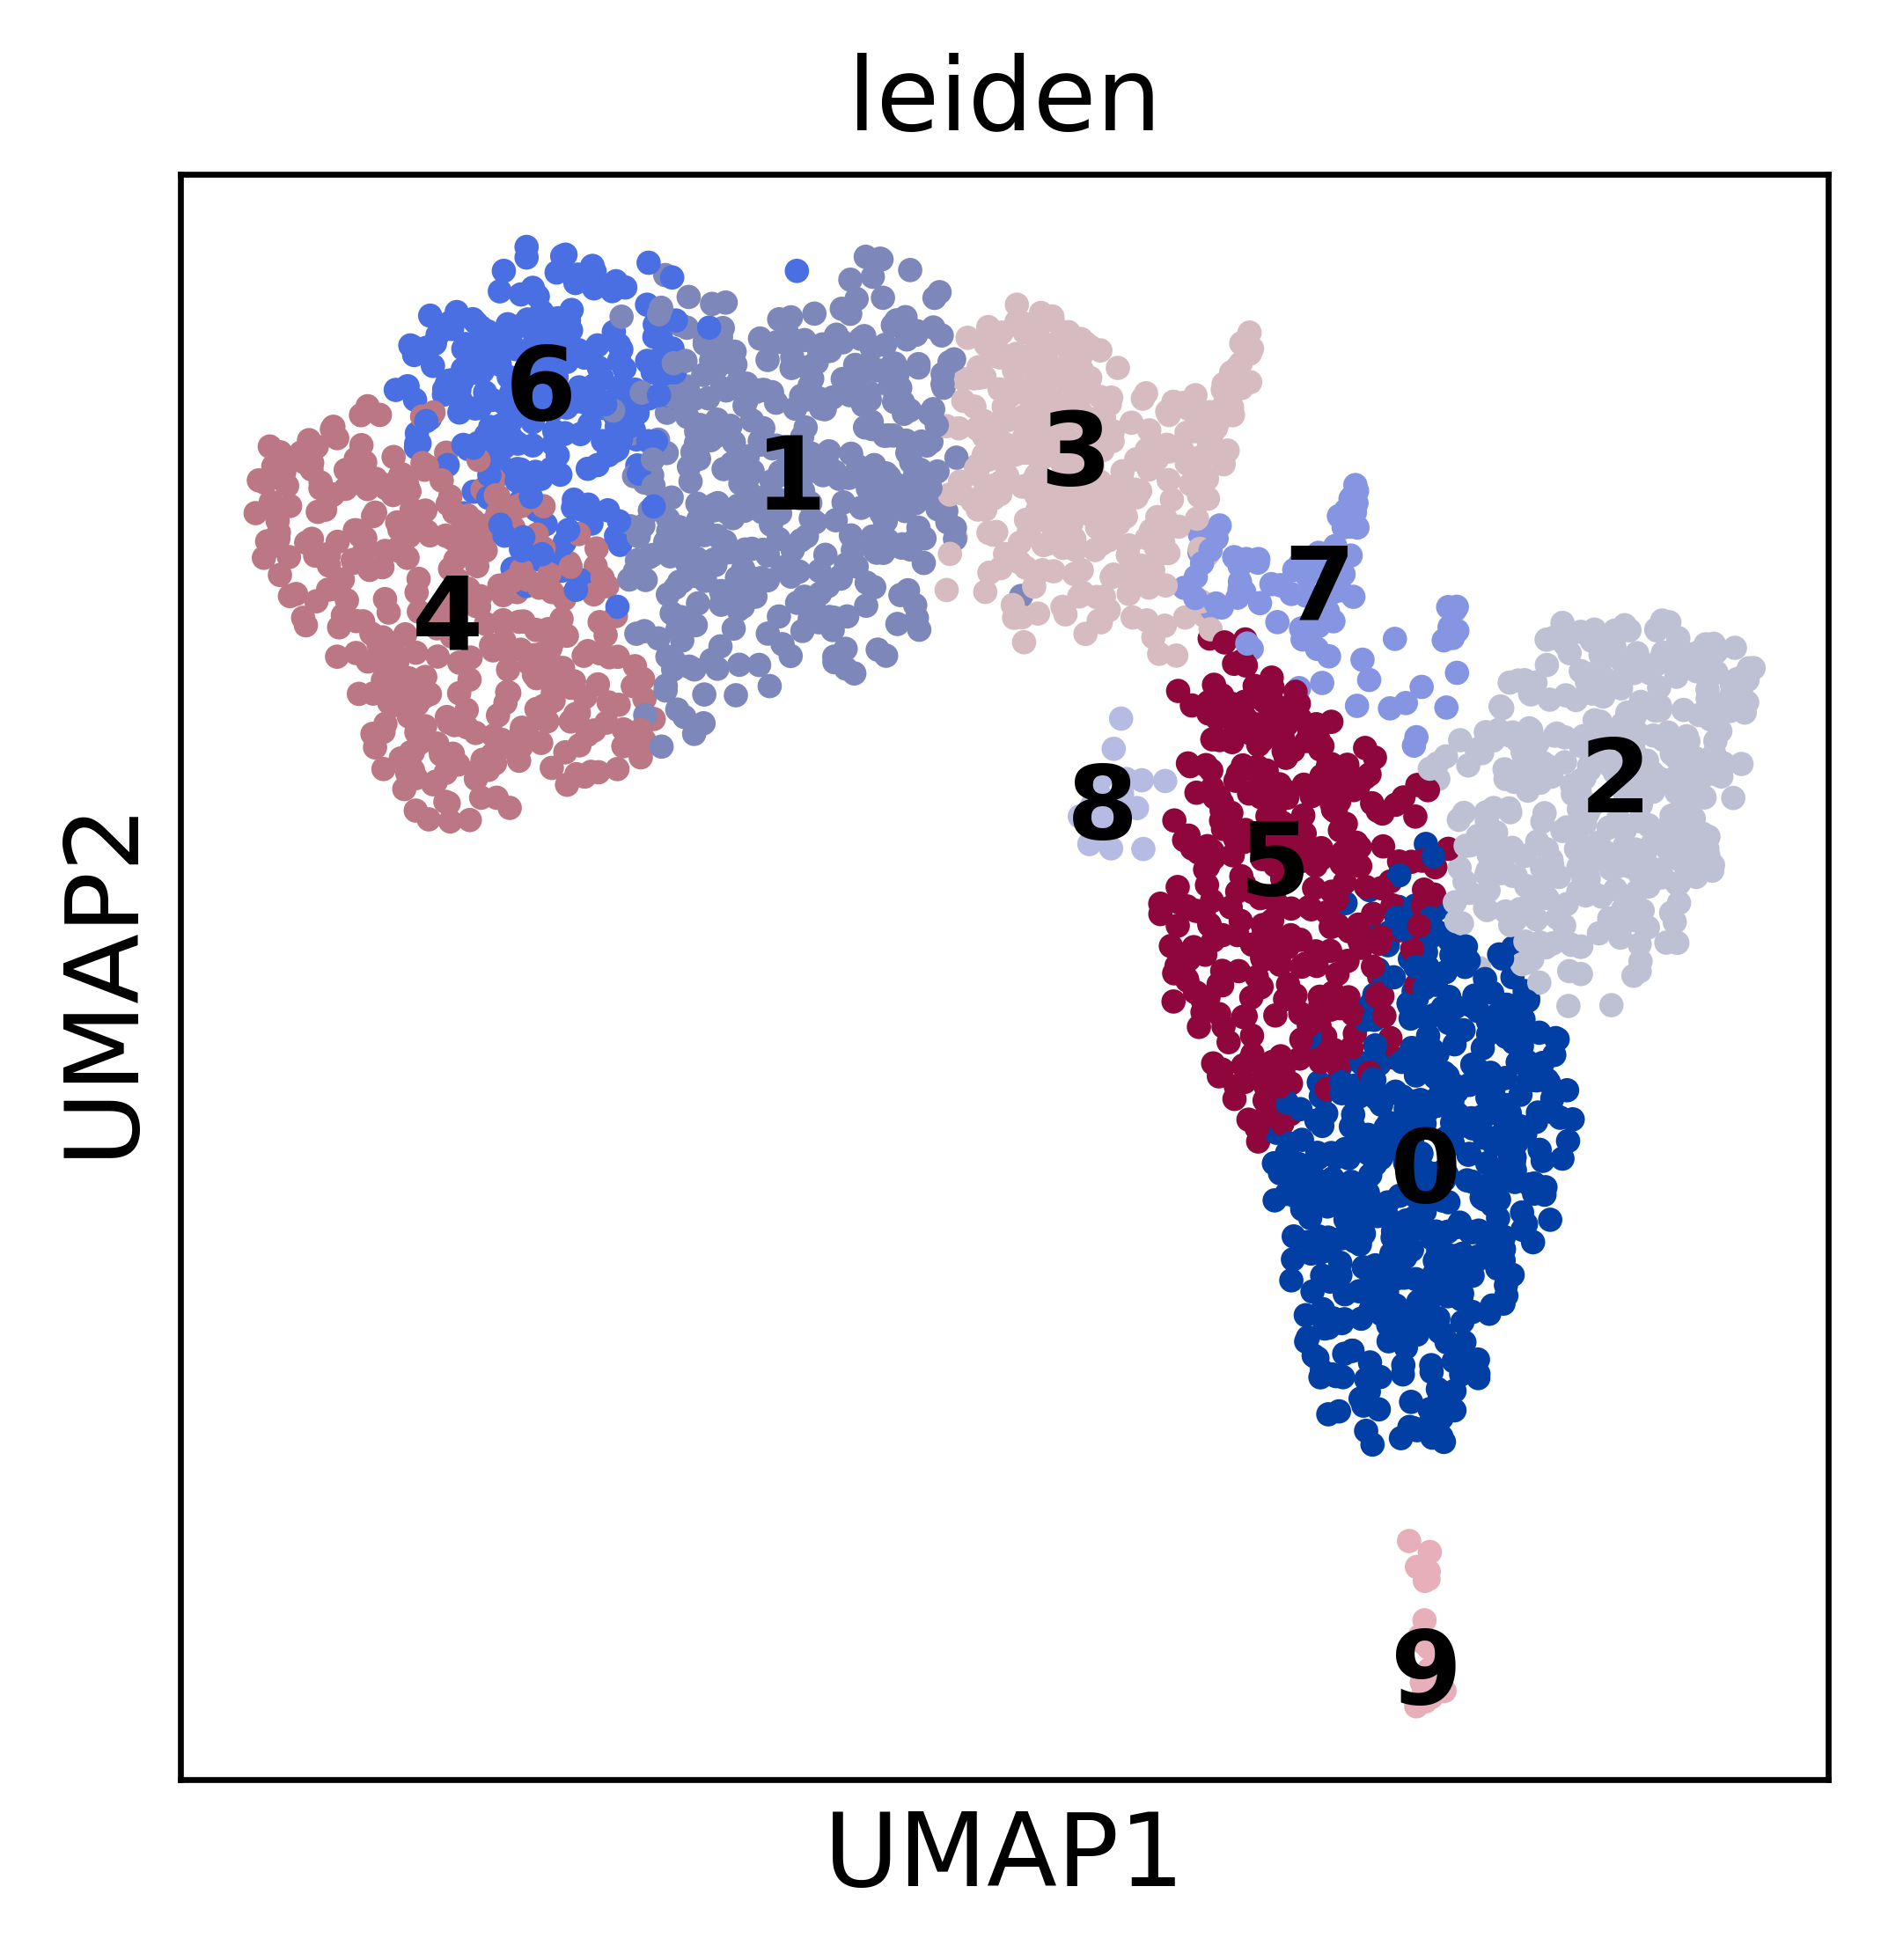

In [10]:
sc.pl.umap(adata, color='leiden', legend_loc='on data')

In [63]:
sc.pl.umap(adata, color='nsbm_level_2', legend_loc='on data')

Cells analyzed here belongs to the myeloid branch of hematopoiesis, which is further froked into two main subgroups: he erythroid one, generated by megakaryocyte-erythroid progenitor (MEP) and the granulocyte-macrophage one, deriving from granulocyte-macrophage progenitor (GMP).

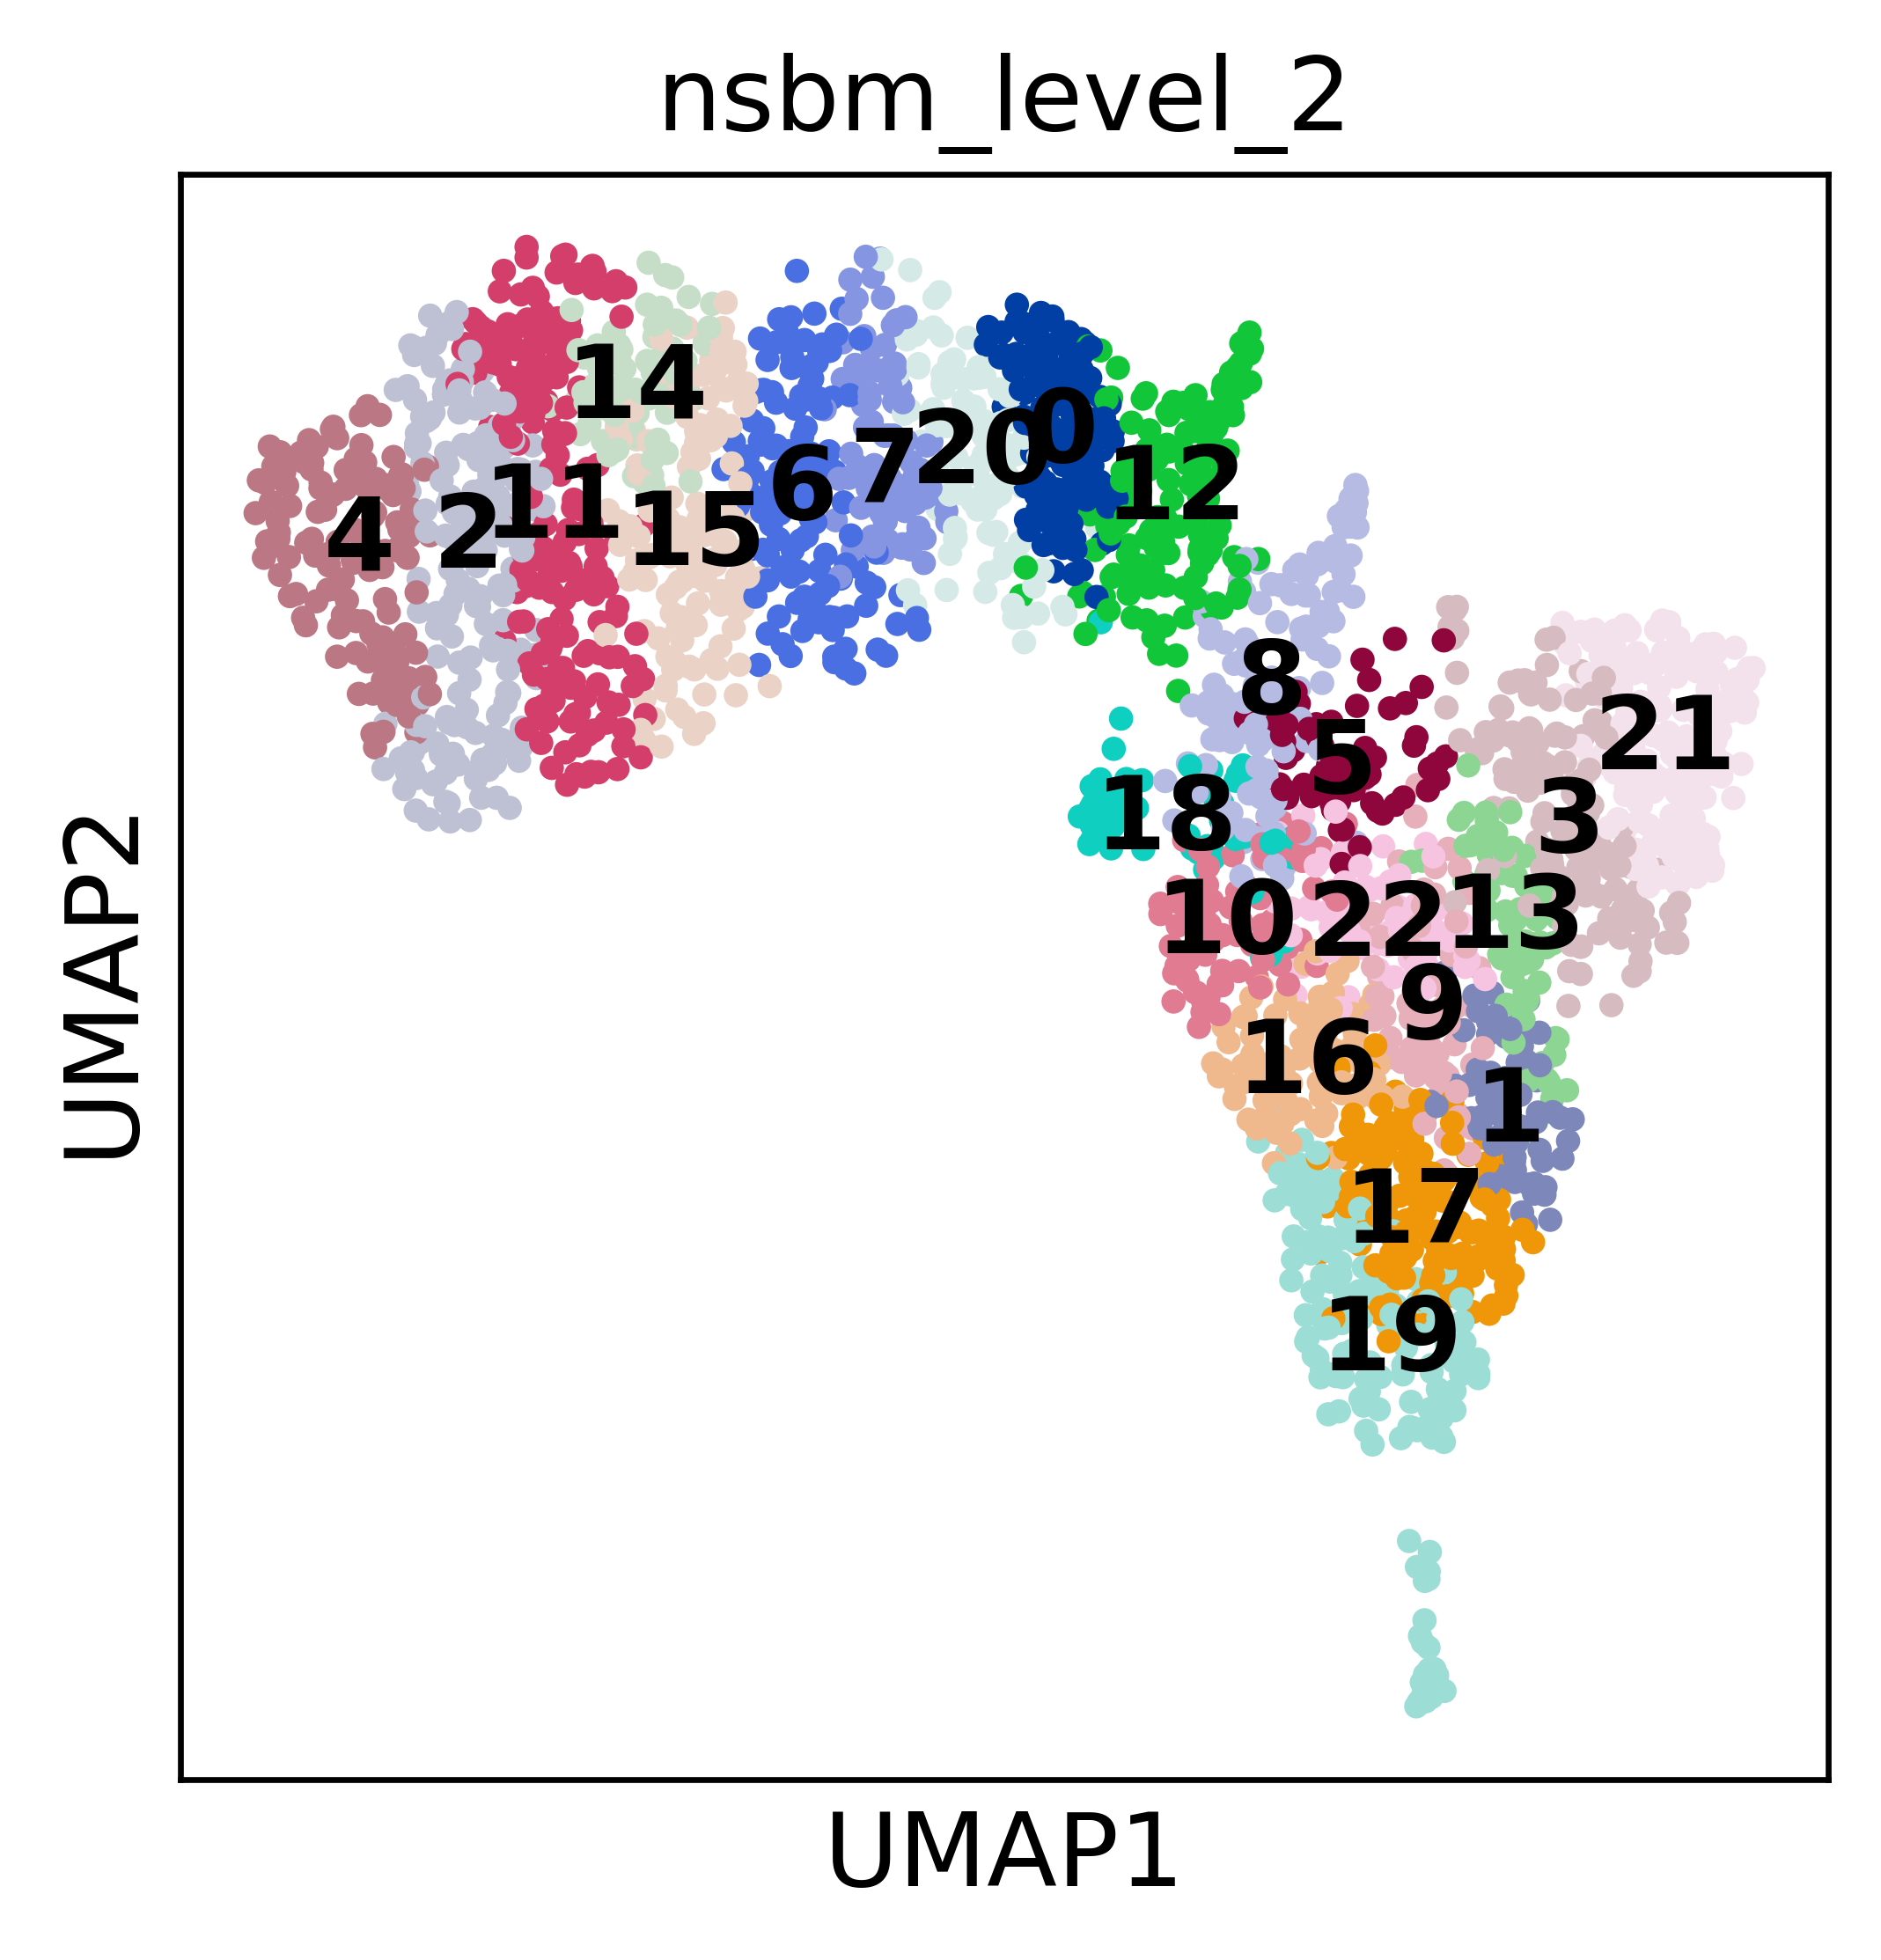

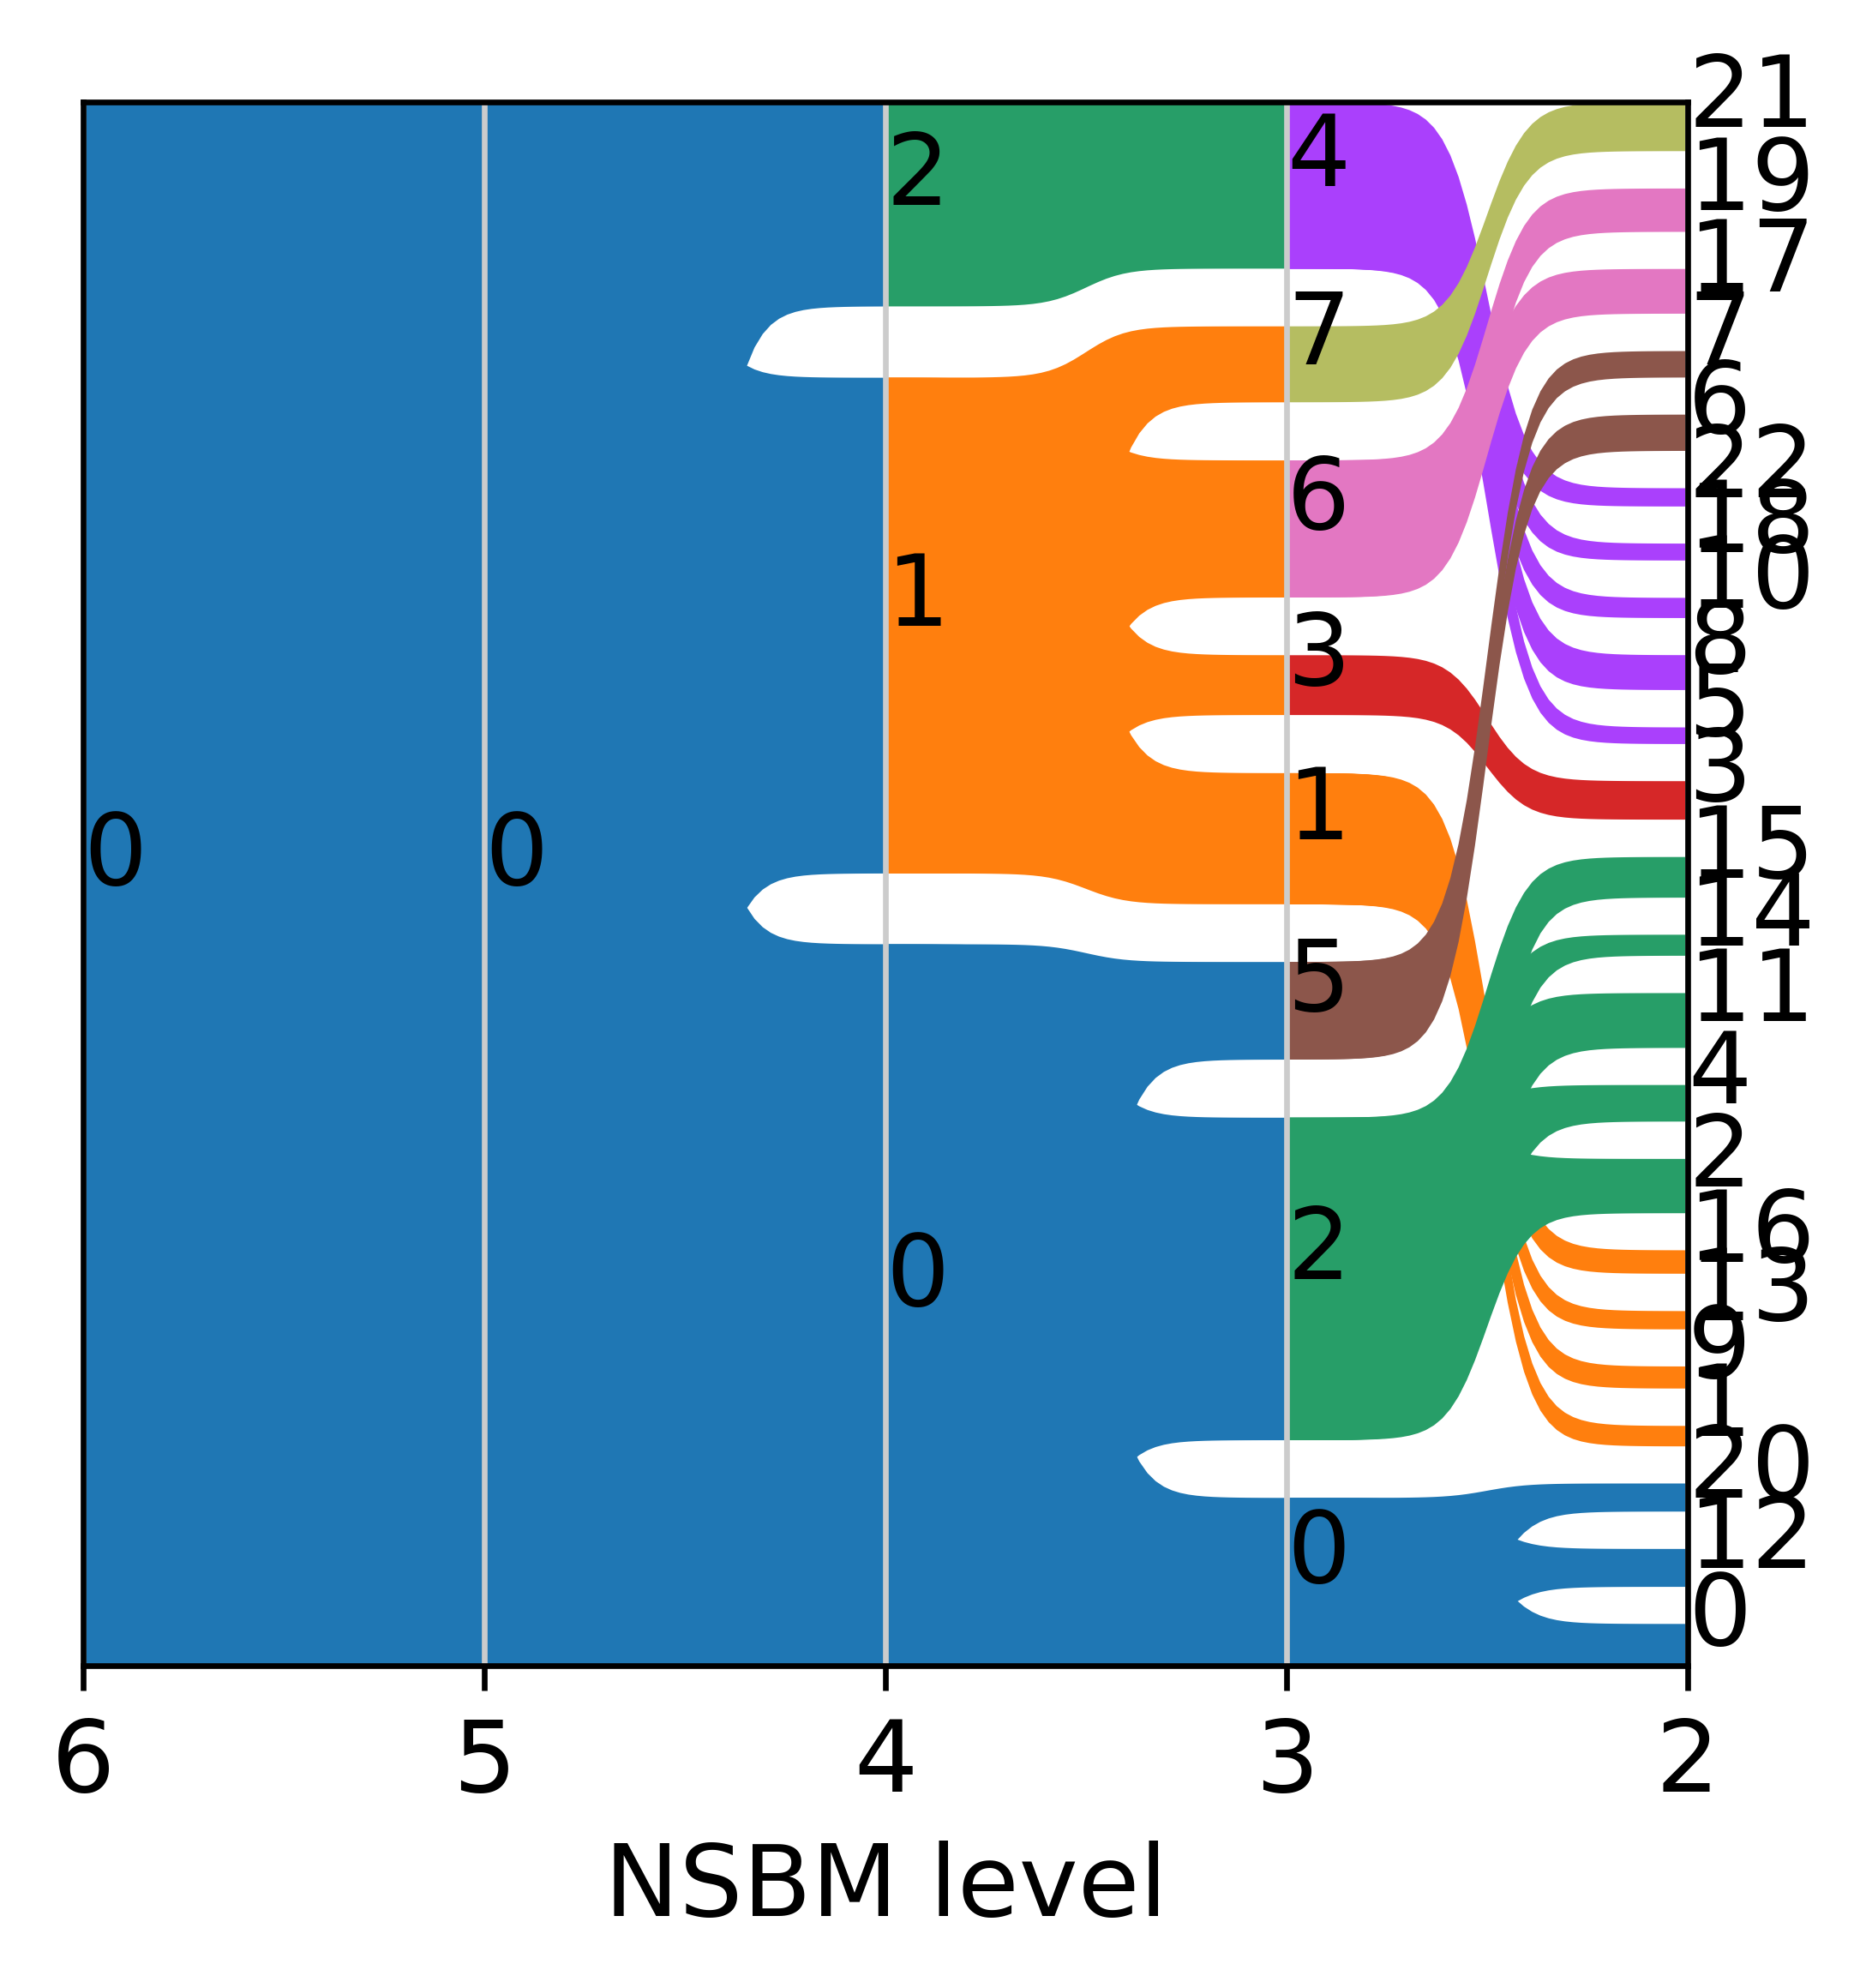

In [6]:
sc.pl.umap(adata, color=['nsbm_level_2'], ncols=2, legend_loc='on data')
schist.pl.alluvial(adata,level_end=6, level_start=2)

The hierarchy obtained via NSBM respects the process of hematopoiesis. The erythroid branch is separated from the granulocyte branch. MEP cells and erythrocytes are joined early in the hierarchy, while the granulocyte branch incorporation occurs as the last step

### leiden paga vs nsbm hierarchy

PAGA applyed to leiden groups, acts similarly to the hierarchiìy obtained by NSBM: however, it incorporates a small group of basophils and a small group of neutrophils in the erithroyd branch too early.

In [9]:
sc.tl.paga(adata, groups='leiden')

In [10]:
G=nx.from_numpy_matrix(adata.uns['paga']['connectivities_tree'].todense())
M=adata.uns['paga']['connectivities'].todense().A1.reshape((24,24))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

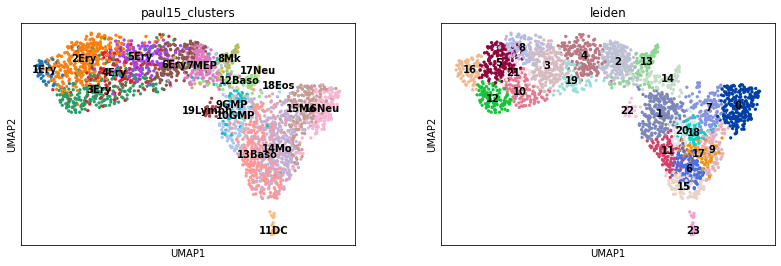

In [11]:
sc.tl.leiden(adata, resolution=3)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden'], ncols=2, legend_loc='on data')

NonGuiException: 

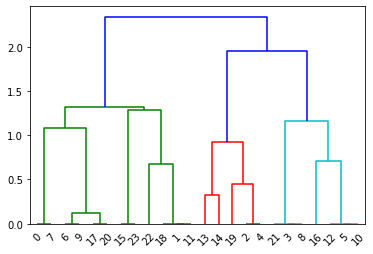

In [12]:
figure()
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)

### nsbm paga vs nsbm hierarchy

On the other hand the behaviour of paga when it is applyed to NSBM clusters, is exactly the same of the NSBM hierarchy

In [2]:
sc.tl.paga(adata, groups='nsbm_level_2')

NameError: name 'adata' is not defined

In [19]:
G=nx.from_numpy_matrix(adata.uns['paga']['connectivities_tree'].todense())
M=adata.uns['paga']['connectivities'].todense().A1.reshape((23,23))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

In [20]:
sc.pl.umap(adata, color=['paul15_clusters', 'nsbm_level_2'], ncols=2, legend_loc='on data')
figure()
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)

In [44]:
schist.pl.alluvial(adata,level_end=6, level_start=2)

# Minimize_weighted